# DS 3000 - Practicum 2

**Student Name**: Hwijoon Lee, Maya Karintholil, Sanya Mittal, and Shreyashi Kalakuntla

**Date**: 2025-02-21


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

In your own words, formulate the Data Science problem that you were given.

In [ ]:
#Write your python code to answer question 1. You can add new cells below as needed.

## Question 2: 
Load the data using pandas and inspect it.

Perform the initial inspection of the data, its shape, types, etc.
Evaluate the dataset and perform at least three type of data preparation and justify the approach that is taken to prepare the data for analysis. Data prep can include, but is not limited to: handling missing values, data types, duplicates, etc. You will need to ensure that your data preparation addressed issues in at least 7 fields in the data.
Prepare meaningful* summary statistics for 3 continuous variables and 3 categorical variables.
Note: meaningful summary statistics explains the statistical summary of relevant fields in a coherent manner.

In [1]:
!pip install folium
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Bird_Strikes_1990_2023.csv')

C:\Users\mayak\AppData\Local\Temp\ipykernel_28600\3040563797.py:9: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bird_Strikes_1990_2023.csv')


In [2]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
INDEX_NR               0
INCIDENT_DATE          0
INCIDENT_MONTH         0
INCIDENT_YEAR          0
TIME              125177
                   ...  
REPORTED_TITLE         0
SOURCE                 0
PERSON             21134
LUPDATE                0
TRANSFER               0
Length: 100, dtype: int64


1. Convert INCIDENT_DATE to datetime type

In [3]:
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'])

2. Handle missing values filling in Unknown for categorical variables and median for numeric variables
- We use median instead of mean because Median is less sensitive to extreme outliers

In [4]:
# Fill missing numeric values
df['LATITUDE'] = df['LATITUDE'].fillna(df['LATITUDE'].median())
df['LONGITUDE'] = df['LONGITUDE'].fillna(df['LONGITUDE'].median())
df['DISTANCE'] = df['DISTANCE'].fillna(df['DISTANCE'].median())

# Fill missing categorical values
df['STATE'] = df['STATE'].fillna('Unknown')
df['FAAREGION'] = df['FAAREGION'].fillna('Unknown')
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].fillna('Unknown')

3. Removing completely empty columns

In [5]:
print("Before removal:")
print("Number of columns:", len(df.columns))

print("\nNon-null value counts for specific columns:")
print("LUPDATE:", df['LUPDATE'].count())
print("TRANSFER:", df['TRANSFER'].count())

print("\nTotal number of rows:", len(df))

# Remove unnecessary columns and duplicates
columns_to_drop = ['LUPDATE', 'TRANSFER']
df = df.drop(columns=columns_to_drop)
df = df.drop_duplicates()

print("\nAfter removal:")
print("Number of columns:", len(df.columns))


Before removal:
Number of columns: 100

Non-null value counts for specific columns:
LUPDATE: 288810
TRANSFER: 288810

Total number of rows: 288810

After removal:
Number of columns: 98


4. Summary Statistics for Continuous Variables:

In [10]:
continuous_vars = ['LATITUDE', 'LONGITUDE', 'DISTANCE']
print("\nSummary Statistics for Continuous Variables:")
print(df[continuous_vars].describe())


Summary Statistics for Continuous Variables:
           LATITUDE      LONGITUDE       DISTANCE
count  2.888100e+05  288810.000000  288810.000000
mean   1.813044e+02     -90.514448       0.530834
std    7.658451e+04     306.472863       2.890473
min   -3.767333e+01    -177.381000       0.000000
25%    3.367566e+01     -97.362440       0.000000
50%    3.880581e+01     -87.904460       0.000000
75%    4.077724e+01     -81.316030       0.000000
max    4.115443e+07  164140.000000      99.000000


Continuous Variables:
- The geographic data shows LATITUDE and LONGITUDE contain outliers beyond valid ranges, requiring cleanup before spatial analysis. 
- DISTANCE measurements reveal most bird strikes (over 50%) occur at 0 distance from airports, with values ranging up to 99 units.

#### Further clearning for Latitude and Longitude
- Latidue contains outliers beyond valid ranges, requiring cleanup before spatial analysis.

In [11]:
df['LATITUDE'] = df['LATITUDE'].apply(
    lambda x: x if (-90 <= x <= 90) else df['LATITUDE'].median()
)
df['LONGITUDE'] = df['LONGITUDE'].apply(
    lambda x: x if (-180 <= x <= 180) else df['LONGITUDE'].median()
)

# Display cleaned summary statistics
print("Cleaned Geographic Coordinates Summary:")
print(df[['LATITUDE', 'LONGITUDE']].describe())

Cleaned Geographic Coordinates Summary:
            LATITUDE      LONGITUDE
count  288810.000000  288810.000000
mean       37.108369     -91.083085
std         6.419505      23.152147
min       -37.673333    -177.381000
25%        33.675660     -97.362440
50%        38.805810     -87.904460
75%        40.777240     -81.316030
max        71.285450     178.559228


5. Summary Statistics for Categorical Variables:

In [15]:
categorical_vars = ['STATE', 'FAAREGION', 'TIME_OF_DAY']
print("\nSummary Statistics for Categorical Variables:")
for var in categorical_vars:
    print(f"\nValue counts for {var}:")
    print(df[var].value_counts().head())
    print(f"Number of unique values: {df[var].nunique()}")


Summary Statistics for Categorical Variables:

Value counts for STATE:
STATE
Unknown    35501
TX         24794
FL         20616
CA         20431
NY         14371
Name: count, dtype: int64
Number of unique values: 68

Value counts for FAAREGION:
FAAREGION
ASO        53932
AEA        40845
AGL        39773
Unknown    35501
ASW        33354
Name: count, dtype: int64
Number of unique values: 11

Value counts for TIME_OF_DAY:
TIME_OF_DAY
Unknown    122416
Day        102548
Night       50446
Dusk         7428
Dawn         5972
Name: count, dtype: int64
Number of unique values: 5


Categorical Variables: 
- Texas, Florida, and California report the highest number of incidents among states, with 68 unique states/territories recorded. 
- The FAA regions show ASO (Southern) leading with 53,932 incidents, followed by AEA (Eastern) with 40,845. 
- TIME_OF_DAY analysis reveals most incidents occur during Unknown and Day periods, with 5 distinct time categories identified.

## Question 3: 
Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

1. Analyze the proportion of incidents that occur each year.
2. Evaluate the distribution of bird strikes in each state and display the top 20 states.
3. What is the most common bird species that are involved in bird strikes.
4. Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.
5. Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.
6. Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1. perform a comparative analysis by evaluating 3 or more groups within the data or 2. perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.

Text(0, 0.5, 'Number of Incidents')

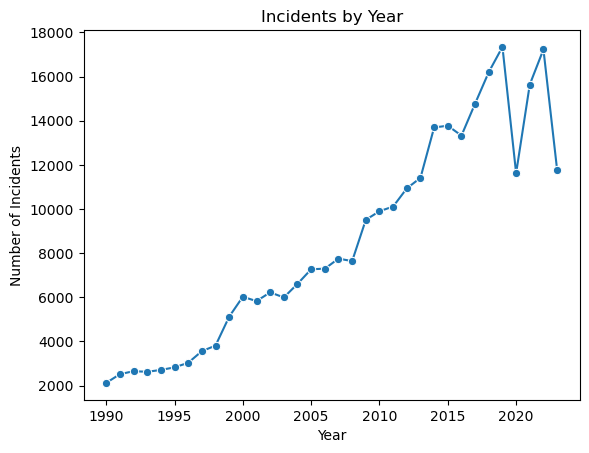

In [17]:
# 1. Analyzing the proportion of incidents that occur each year
yearly_incidents = df.groupby('INCIDENT_YEAR')['INDEX_NR'].count().reset_index()

sns.lineplot(data=yearly_incidents, x='INCIDENT_YEAR', y='INDEX_NR', marker='o')
plt.title('Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

This chart visualizes the number of incidents that occur each year. From 1990 to about 2018, there was an upwards trend which could either mean that wildlife populations have increased, causing more incidents or there has been more air traffic which can also cause more incidents. However, there was a large fall in the number if incidents in 2020 which may because air traffic had significantly decreased tdue to Covid-19. Then there was another spike around 2021 or 2022, which means that there was more air traffic again. Then in 2023, there was another significant drop which could suggest effective mitigation strategies. Overall the trend has significantly increased since 1990 meaning the incidents per year is likely to increase.

Text(0, 0.5, 'Number of Incidents')

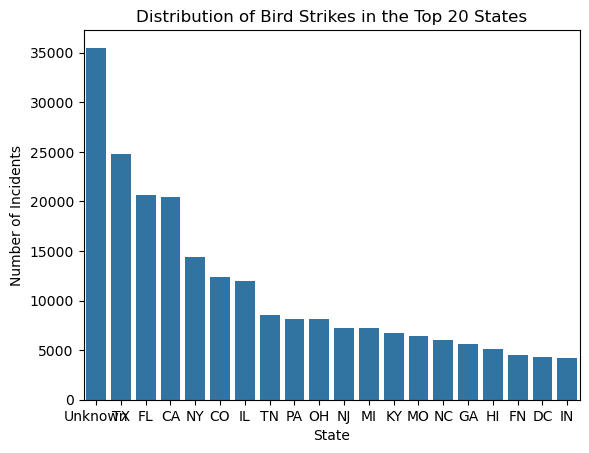

In [19]:
# Evaluating the distribution of bird strikes in each state and displaying the top 20 states.
incidents_state = df.groupby('STATE')['INDEX_NR'].count().reset_index()

top_20 = incidents_state.sort_values('INDEX_NR', ascending=False).head(20)

sns.barplot(data=top_20, x='STATE', y='INDEX_NR')
plt.title('Distribution of Bird Strikes in the Top 20 States')
plt.xlabel('State')
plt.ylabel('Number of Incidents')

This chart visualizes the distribution of bird strikes in the top 20 states that have the highest number of bird strikes. Texas has the highest number of incidents amongst all 50 states while Florida has the second most number of incidents. This may because the migratory bird paths may lie more in these regions so they are more prone to having incidents. 

Text(0, 0.5, 'Number of Incidents')

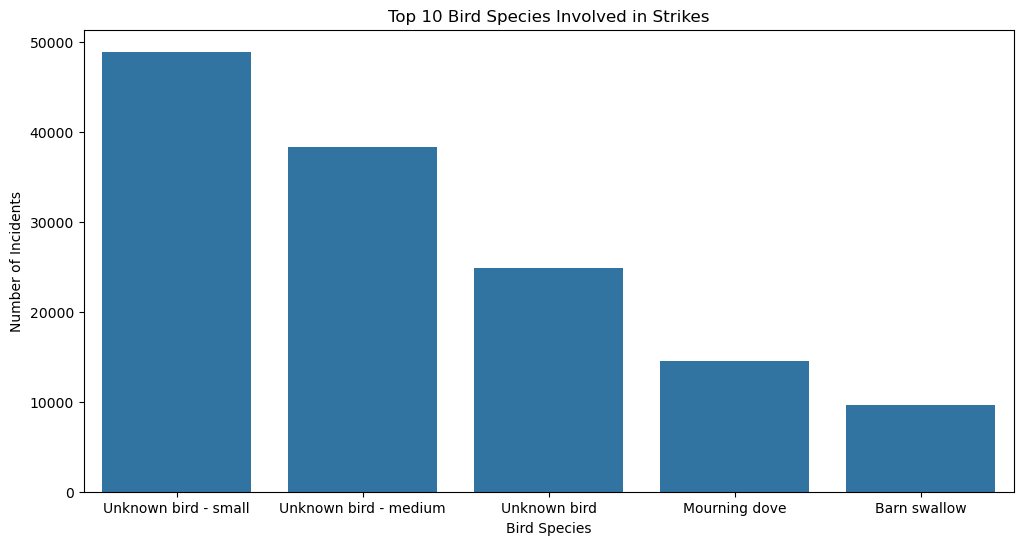

In [21]:
# Most common bird species that are involved in bird strikes
incident_common_species = df.groupby('SPECIES')['INDEX_NR'].count().reset_index()

common_species = incident_common_species.sort_values('INDEX_NR', ascending=False).head(5)

plt.figure(figsize=(12,6))
sns.barplot(data=common_species, x='SPECIES', y='INDEX_NR')
plt.title('Top 10 Bird Species Involved in Strikes')
plt.xlabel('Bird Species')
plt.ylabel('Number of Incidents')

Most of the time, the birds' species are unknown when involved in these incidents. However, the Mourning Dove has the highest number of incidents for the species that are known. After that Barn Swallow has the second most number of incidents amongst the known species that are involved in bird strikes.

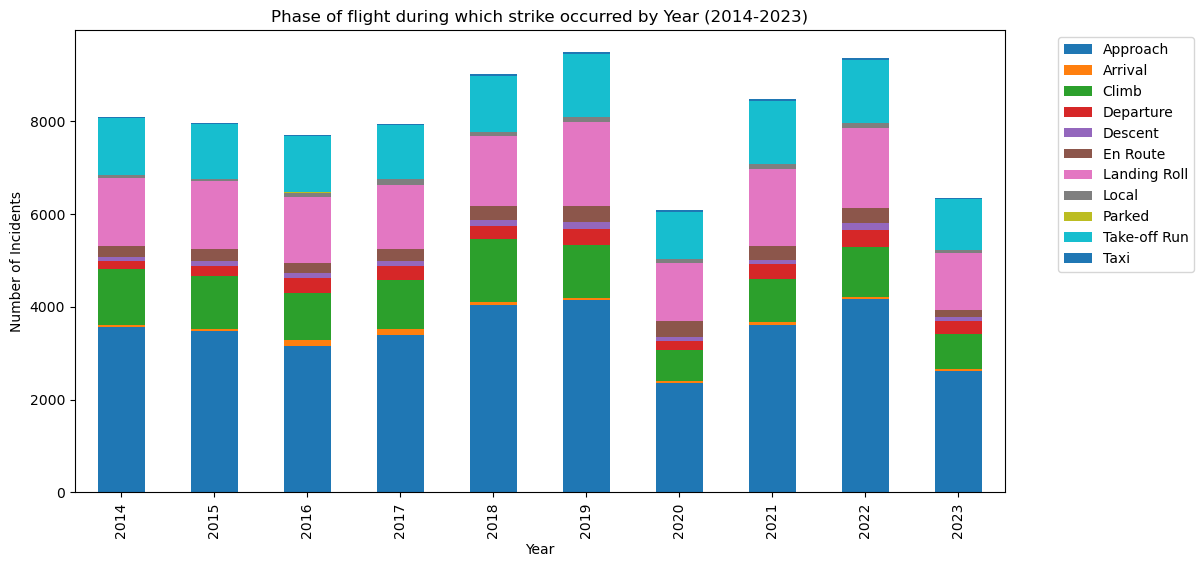

In [23]:
# Perform a comparative analysis of the annual aircraft damage for each phase of flight. 
# Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.
df_10yr_period = df[df['INCIDENT_YEAR'] >= 2014]

phase_of_flight_damage = df_10yr_period.groupby(['INCIDENT_YEAR','PHASE_OF_FLIGHT'])['INDEX_NR'].count().reset_index()

data = phase_of_flight_damage.pivot_table(index='INCIDENT_YEAR', columns=['PHASE_OF_FLIGHT'], values='INDEX_NR', fill_value=0)

data.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Phase of flight during which strike occurred by Year (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

This chart visualizes the phase of flight during which a strike occurred over the last 10 year period (2014-2023). It seems to be that the approach phase of the flight has the most strikes, with landing roll, and take-off run after. 

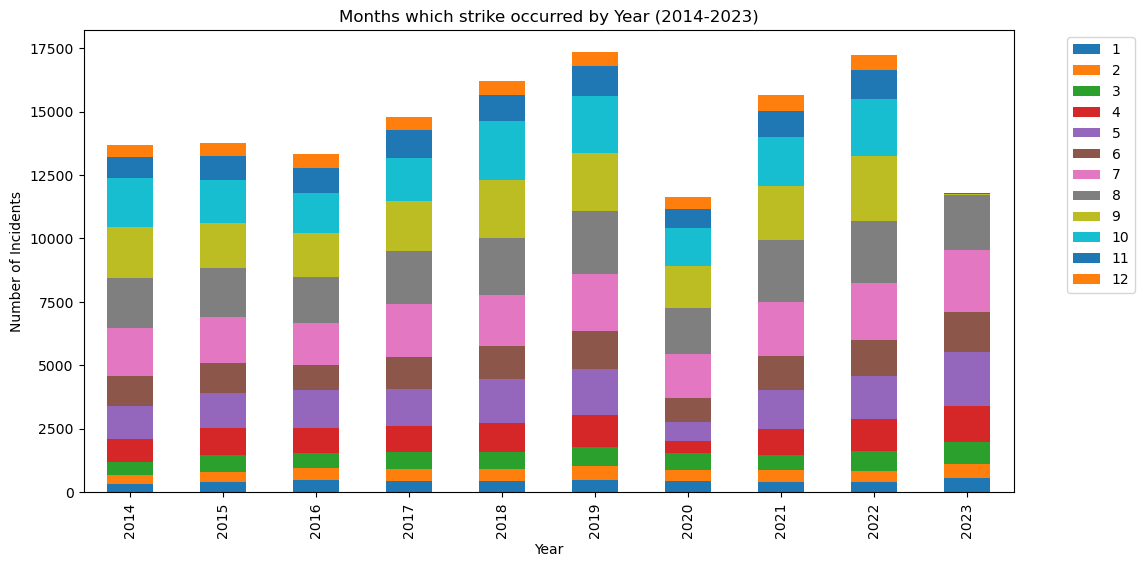

In [25]:
# Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. 
# Analyze the results to determine when these incidents are more prevalent. 
# This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. 
# Note: this requires a year over year analysis.

monthly_incidents = df_10yr_period.groupby(['INCIDENT_YEAR','INCIDENT_MONTH'])['INDEX_NR'].count().reset_index()

monthly_pivot = monthly_incidents.pivot_table(index='INCIDENT_YEAR', columns='INCIDENT_MONTH', values='INDEX_NR')

monthly_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Months which strike occurred by Year (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

This chart visualizes the number of strikes that occured each year and each month. Every bar represents a year while each color represents a month. This chart shows that October (10), September (9), August (8), and July (7) have the highest number of incidents. This is likely due to the birds' migration patterns and when they migrate. These months are during the warmer season, indicating that they may be migrating during this time, causing more air strike incidents. 

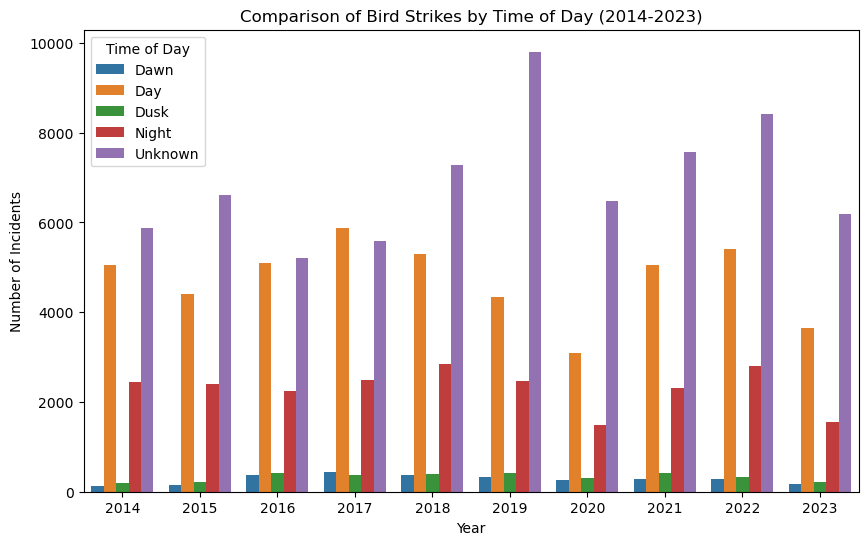

In [27]:
# Perform ONE (1) additional analysis on the distribution. Ensure that you either : 
# 1. perform a comparative analysis by evaluating 3 or more groups within the data or 
# 2. perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). 
# Do not repeat any of the previous analysis.

# Compare strikes at time of day over 10 years (2014-2023)
time_day = df_10yr_period.groupby(['INCIDENT_YEAR','TIME_OF_DAY'])['INDEX_NR'].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=time_day, x='INCIDENT_YEAR', y='INDEX_NR', hue='TIME_OF_DAY')
plt.title('Comparison of Bird Strikes by Time of Day (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Time of Day')

This graph visualizes the number of incidents according to the time of day over the past 10 years (2014-2023). It seems like most incidents occur during the day, most likely because there is more air traffic during the day. The second most time of day that bird strikes occur is during the night. The least time odf day to have bird strikes seems to be at dawn. 

## Question 4: 
Perform pairwise analysis of select features and evaluate the significance of the pattern or trend. A suitable value for alpha is 5%. Explain all results.

1. Create a scatterplot that shows the relationship between aircraft height and speed. Evaluate the correlation, the strength and the significance of the results.
2. Visualize the distribution of the aircraft speed during: 1. the approach phase of flight and 2. the landing roll phase of flight. Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases. Tip: if the data is skewed, you will need to address this prior to the statistical analysis.
3. Create a visualization of the aircraft damage grouped by phase of flight.
Evaluate if the results are statistically significant. Ensure that you use the appropriate test.
4. Perform ONE (1) additional statistical test.
Explain what you are testing and the reason this information is useful.
Visualize the data, state the hypothesis and explain if it is statistically significant.

In [29]:
# Create a scatterplot that shows the relationship between aircraft height and speed. 
# Evaluate the correlation, the strength and the significance of the results. 

# Checking for missing values in both variables: 
print(df['HEIGHT'].info())
print()
print(df['SPEED'].info())
print() 

# Out of 288810 rows, only 148807 are non-null in HEIGHT, and 94237 in SPEED. Imputation of these rows would skew the data greatly, as there a large amount of null values
# So these missing values will be dropped 
# Drop rows where either HEIGHT or SPEED is missing
filtered_df = df[['HEIGHT', 'SPEED']].dropna()

# Extract the columns
aircraft_heights = filtered_df['HEIGHT']
aircraft_speeds = filtered_df['SPEED']


# Analyzing for invalid values in HEIGHT and SPEED: 
print(aircraft_heights.value_counts().sort_index()) # No negative values, some very high values at 30,000 feet+, but we can keep these data points in because some aircrafts can reach that high when in flight. 
                                                # Heights of 0 are also valid, as aircraft strikes during taxi, takeoff and landing at 0 feet can occur

print(aircraft_speeds.value_counts().sort_index()) #Extreme high speeds of 1000+ knots may seem like outliers, but some military jets have reached that speed - so we will keep these data points
                                               #No negative speeds recorded, and speeds of 0 could make sense as well: if bird strikes occured while the aircraft was at a stop. 

<class 'pandas.core.series.Series'>
RangeIndex: 288810 entries, 0 to 288809
Series name: HEIGHT
Non-Null Count   Dtype  
--------------   -----  
148807 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB
None

<class 'pandas.core.series.Series'>
RangeIndex: 288810 entries, 0 to 288809
Series name: SPEED
Non-Null Count  Dtype  
--------------  -----  
94237 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB
None

HEIGHT
0.0        24682
1.0          128
2.0          202
3.0          165
4.0           70
           ...  
24000.0        1
25000.0        3
27500.0        1
29000.0        1
30000.0        1
Name: count, Length: 627, dtype: int64
SPEED
0.0       60
1.0        2
2.0        4
3.0        6
4.0        5
          ..
380.0      1
400.0      2
650.0      1
1150.0     1
1250.0     1
Name: count, Length: 284, dtype: int64


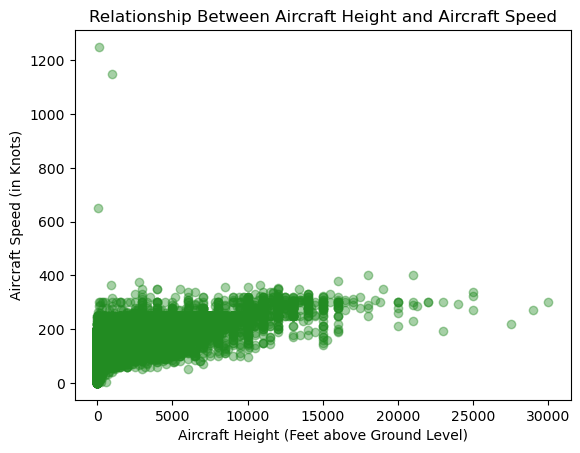

In [31]:
# Plotting the relationship between aircraft height and speed

plt.scatter(aircraft_heights, aircraft_speeds, color = '#228B22', alpha = 0.4)
plt.title('Relationship Between Aircraft Height and Aircraft Speed')
plt.xlabel('Aircraft Height (Feet above Ground Level)')
plt.ylabel('Aircraft Speed (in Knots)')
plt.show()

We can see a positive correlation between height and speed at lower altitudes. This indicates that as aircrafts climb in ascent, they tend to increase speed. The majority of data clusters between 200 and 300 knots, regardless of altitude, suggesting cruising speeds for most aircrafts are between this range. There are a few notable outliers at very low altitudes with extremely high speeds, which could represent military fighter jets, which are known to reach those speeds. 

In [35]:
# Calculating the correlation coefficient:
import scipy.stats as stats
correlation, p_value = stats.pearsonr(aircraft_heights, aircraft_speeds)

print('Correlation Coefficient:', round(correlation, 2))
print('P-value:', p_value)

Correlation Coefficient: 0.7
P-value: 0.0


The correlation coefficient of 0.7 between aircraft height and speed is a moderate to strong positive correlation, as an r between 0 and 1 indicates that as height increases, aircraft speed also tends to increase. The strength of this correlation is strong, as ~0.7 is closer to 1 and than 0. This indicates that there is and noticeable postive relationship between aircraft height and speed. The significance, indicated by a p-value of 0, is less than 0.5 which suggests a statistically significant correlation. 

PHASE_OF_FLIGHT
Approach        75224
Landing Roll    32157
Take-off Run    30248
Climb           26957
En Route         5308
Departure        2933
Descent          2331
Local            1150
Arrival           753
Taxi              667
Parked            115
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 288810 entries, 0 to 288809
Series name: PHASE_OF_FLIGHT
Non-Null Count   Dtype 
--------------   ----- 
177843 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB
None


Text(0, 0.5, 'Frequency')

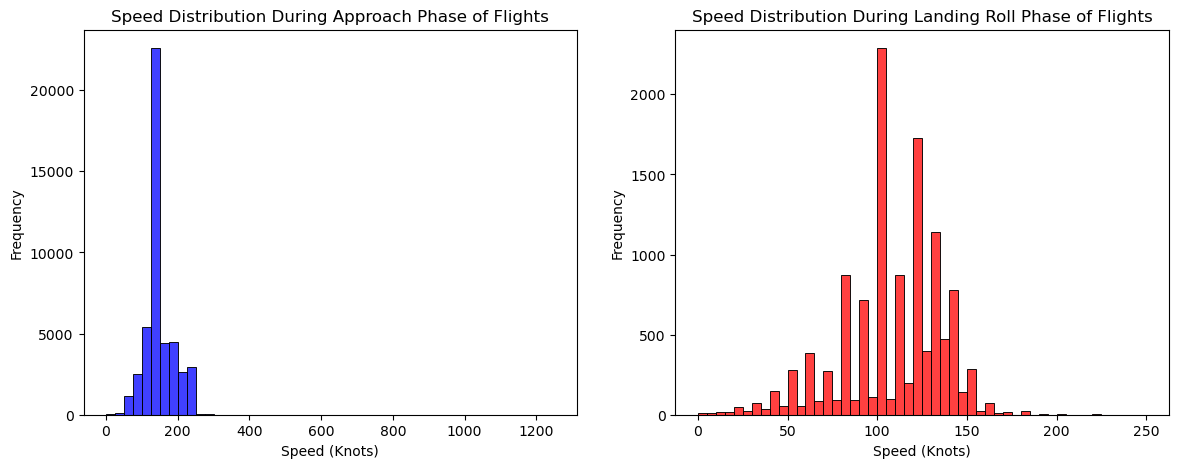

In [38]:
# Visualize the distribution of the aircraft speed during: 
# 1. the approach phase of flight and
# 2. the landing roll phase of flight.
# Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases.
# Tip: if the data is skewed, you will need to address this prior to the statistical analysis. 

# Analyzing PHASE_OF_FLIGHT for missing and invalid values 
print(df['PHASE_OF_FLIGHT'].value_counts()) # All values are valid phases when in flight 
print(df['PHASE_OF_FLIGHT'].info()) # Out of 288000+ rows, only 177,843 are non-null

# Dropping missing values, as imputation of a large % of the data would cause the data to skew, and data points to cluster. First creating a copy of df to preserve original dataset
filtered_df = df.dropna(subset=['SPEED', 'PHASE_OF_FLIGHT'])

# Extracting speeds based on 'PHASE_OF_FLIGHT'
approach_speeds = filtered_df[filtered_df['PHASE_OF_FLIGHT'] == 'Approach']['SPEED']
landing_roll_speeds = filtered_df[filtered_df['PHASE_OF_FLIGHT'] == 'Landing Roll']['SPEED']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Approach Phase
sns.histplot(approach_speeds, bins=50, color='blue', ax = axes[0])
axes[0].set_title('Speed Distribution During Approach Phase of Flights')
axes[0].set_xlabel('Speed (Knots)')
axes[0].set_ylabel('Frequency')

# Histogram for Landing Roll Phase
sns.histplot(landing_roll_speeds, bins=50, color='red', ax = axes[1])
axes[1].set_title('Speed Distribution During Landing Roll Phase of Flights') 
axes[1].set_xlabel('Speed (Knots)')
axes[1].set_ylabel('Frequency')

The left graph shows aircraft speeds during the approach phase of flight. The distribution shows a concentration cluster of speeds in between 100-250 knots. The peak frequency is around 150-175 knots with approximately 22,000 occurrences and the distribition is slightly left-skewed, indicating most aircrafts maintain similar speeds in the approach phase. The right graph shows aircraft speeds during the landing roll phase of flight. The distribution shows speeds between 0-250 knots, with most activity between 50-175 knots, with the peak around 120 knots with approximately 2200 occurrences. This distribution is wider and more irregular than the approach phase, with multiple peaks suggesting different landing techniques. 

In [44]:
# Checking the skewness of both distributions: 
from scipy.stats import skew

print('Approach skew:', skew(approach_speeds, nan_policy='omit'))
print('Landing Roll skew:', skew(landing_roll_speeds, nan_policy='omit'))

Approach skew: 1.4485112436874352
Landing Roll skew: -0.6145348457109601


The approach phase distribution suggests a right skew, as the skewness is >0. The landing roll phase distribution suggests a slight left skew, as the skewness is <0. So we will account for the right skewed approach phase distribution by applying a log transformation to compress the longer tails and make the distributions more normal, thereby decreasing the skew. As the Landing roll distribution is not as highly skewed, we will leave it as is. 

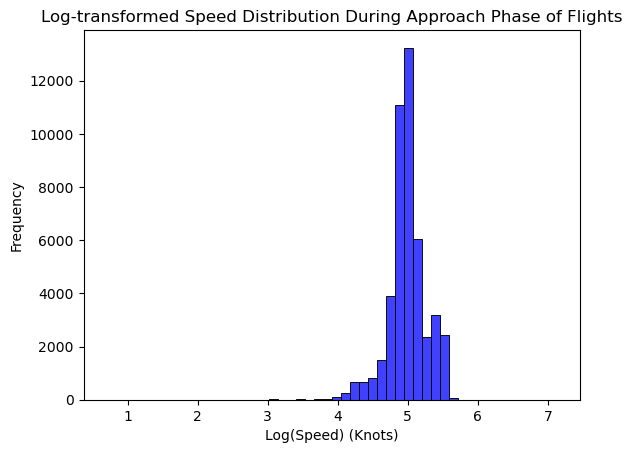

In [55]:
log_approach_speeds = np.log1p(approach_speeds)

# Histogram for Approach Phase with Log-transformed data
sns.histplot(log_approach_speeds, bins=50, color='blue')
plt.title('Log-transformed Speed Distribution During Approach Phase of Flights')
plt.xlabel('Log(Speed) (Knots)')
plt.ylabel('Frequency')
plt.show()

In [73]:
#Performing a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases.
from scipy.stats import ttest_ind

t, p_value = stats.ttest_ind(log_approach_speeds, landing_roll_speeds)

alpha = 0.05
if p_value < alpha:
    print('P value: ', p_value, 'There is a statistically significant difference in prices between aircraft speeds during the two flight phases')
else:
    print('P value: ', p_value, 'There is NO statistically significant difference in prices between aircraft speeds during the two flight phases.')

P value:  0.0 There is a statistically significant difference in prices between aircraft speeds during the two flight phases


The difference in speeds between the Approach phase and the Landing Roll phase is highly significant due to a p-value < 0.05. This tells us that aircraft speeds behave distinctly during each of these phases of flight. 

<class 'pandas.core.series.Series'>
RangeIndex: 288810 entries, 0 to 288809
Series name: DAMAGE_LEVEL
Non-Null Count   Dtype 
--------------   ----- 
187315 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB
None
DAMAGE_LEVEL
N     167573
M       8578
M?      6821
S       4261
D         82
Name: count, dtype: int64


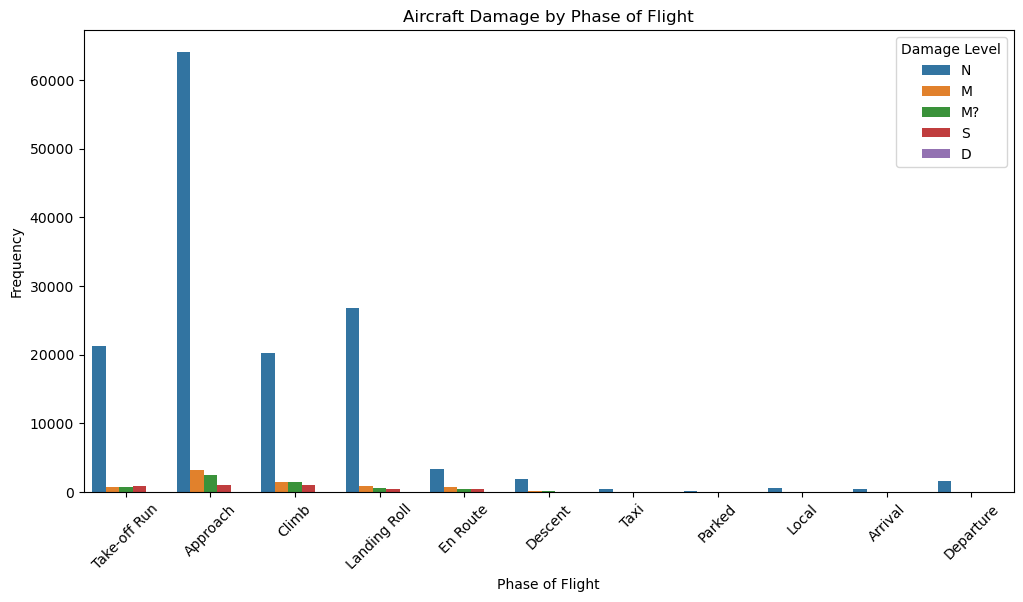

In [79]:
# Create a visualization of the aircraft damage grouped by phase of flight.
# Evaluate if the results are statistically significant. Ensure that you use the appropriate test. 
print(df['DAMAGE_LEVEL'].info()) 
print(df['DAMAGE_LEVEL'].value_counts()) # only 187315 non-null values, so will drop missing values, as imputation will skew the data and the distruibution

filtered_df_damage = df.dropna(subset=['DAMAGE_LEVEL', 'PHASE_OF_FLIGHT'])

# Both are categorical variables: 
plt.figure(figsize = (12, 6))
sns.countplot(data = filtered_df_damage, x ='PHASE_OF_FLIGHT', hue ='DAMAGE_LEVEL')

plt.xlabel('Phase of Flight')
plt.ylabel('Frequency')
plt.title('Aircraft Damage by Phase of Flight')
plt.xticks(rotation = 45)  # Rotate labels for readability
plt.legend(title ='Damage Level')
plt.show() 

According to the plot above, there seems to be an interesting pattern in the damage level of bird strikes on aircrafts for each phase of flight. In every phase, the dominating damage level is 'N', or 'None', which makes sense as bird strikes occur with birds that are extremely small in comparison to the size of the aircraft. The approach phase has the highest frequency of No damage, while the 'Take-off Run', 'Landing Roll', 'Climb', and 'Approach' phases have smaller frequencies of damage levels of Minor, Undeterminate Level, or in rarer cases, Substantial. This also makes sense, as in rare cases, for example if a bird strike occurs to the engine of an aircraft, can cause substantal damage to the plane's flight ability. 

In [85]:
# Doing a chi-squared test to test for significance (since both variables are categorical): 
from scipy.stats import chi2_contingency

# Creating contingency table from df
data = pd.crosstab(filtered_df_damage['PHASE_OF_FLIGHT'], filtered_df_damage['DAMAGE_LEVEL']).values  

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-Square Statistic:", round(chi2, 2))
print("p-value:", p)

Chi-Square Statistic: 5070.97
p-value: 0.0


The chi-squared statistic of 5070.97 and a p-value close to 0.0 indicates a significant relationship between PHASE_OF_FLIGHT and DAMAGE_LEVEL. It suggests that the two variables are not independent and there is likely a relationship between them. For example, certain phases of flight may be more likely to have specific levels of damage, or the distribution of damage levels might vary depending on the phase of flight. 

TIME_OF_DAY
Unknown    122416
Day        102548
Night       50446
Dusk         7428
Dawn         5972
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 288810 entries, 0 to 288809
Series name: TIME_OF_DAY
Non-Null Count   Dtype 
--------------   ----- 
288810 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB
None


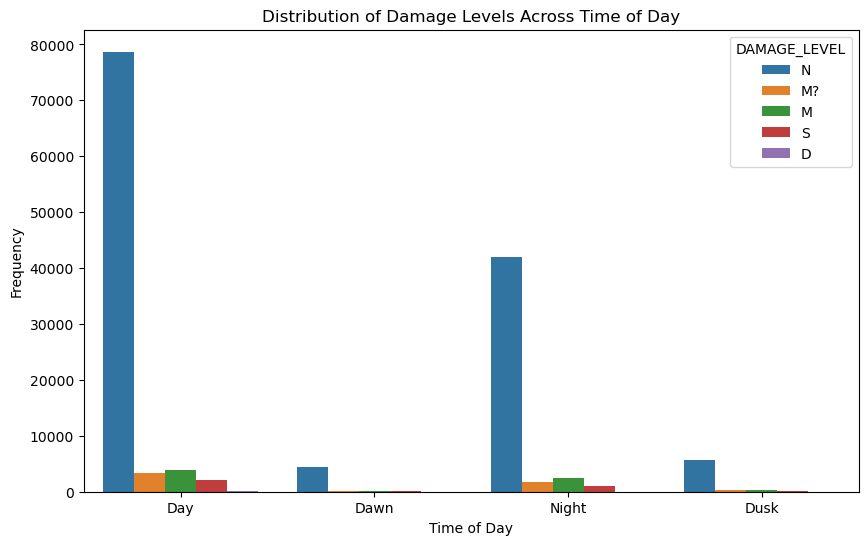

In [107]:
# Perform ONE (1) additional statistical test. Explain what you are testing and the reason this information is useful. 
# Visualize the data, state the hypothesis and explain if it is statistically significant.

# Analyzing if there is a correlation between time of day and damage levels
# # Analyzing TIME_OF_DAY for missing and invalid values 
print(df['TIME_OF_DAY'].value_counts())
print(df['TIME_OF_DAY'].info()) # Null values have been imputed with 'Unknown', which will skew the data heavily, hence we will drop these rows and work with the remaining values 

filtered_df2 = df[df['TIME_OF_DAY'] != 'Unknown'].dropna(subset=['DAMAGE_LEVEL'])

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df2, x='TIME_OF_DAY', hue='DAMAGE_LEVEL')
plt.title('Distribution of Damage Levels Across Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.show()

Null Hypothesis: There is no significant correlation between the time of day and bird strike damage level. 
Alternative Hypothesis: There is a significant correlation between the time of day and bird strike damage level. 
The above plot shows that most aircraft incidents across all times of day result in No Damage (N). Day time has both the highest number of no-damage events and the highest number of damage events across all categories, which is expected given the higher volume of daytime flights. The relative proportion of damage categories appears fairly consistent across different times of day, though the sample sizes for dawn and dusk are much smaller. Minor damage appears to be the second most common outcome after no damage, followed by undeterminate damage levels, then substantial damage. 

In [105]:
contingency_table2 = pd.crosstab(filtered_df2['TIME_OF_DAY'], filtered_df2['DAMAGE_LEVEL'])

# Perform the Chi-square test
chi2_stat2, p_val2, dof2, expected2 = stats.chi2_contingency(contingency_table2)


print("Chi-Square Statistic:", round(chi2_stat2, 2))
print("p-value:", round(p_val2, 2))

Chi-Square Statistic: 106.46
p-value: 0.0


The chi-squared statistic of 106.46 indicates that the difference between the observerd distribution of damage levels across different times of day and the expected distribution is susbtantial. Given a p-value <0.05, we can reject the null hyothesis and conclude that there is significant correlation between aircraft damage levels and the time of day bird strikes occur.  

## Question 5: 
Explore a simple linear relationship* within the data and create a model to predict the occurrence of bird strikes in a given FAA region. Ensure that you explain all results.

Extract all data for the AWP FAA Region and use a line chart to visualize the frequency of incidents between 1990 and 2015 inclusive.
Using the extracted data above, create a simple linear regression model and predicts the incidents for 2016 and 2017.
Display the r-squared and what this indicates about your model's ability to fit the data.
Visualize the dataset from (1) and include the predicted results for 2016 and 2017.
Compare and contrast the predictions for 2016 and 2017 with the actual values.
Perform predictions for 2018 through to 2020. Explain what transpired when your model was used to predict this time period. Comment on the reliability of your model.
*Tip: It is important to remember that you are creating a simple linear regression model, which is limited in features and does not include information about all factors that influence the frequency of bird strikes. Keep this in mind while framing your response and explanations

## Question 6: 
Summarize the overall analysis for questions 1 through 5 and share THREE (3) key findings.

## Question 7

This optional bonus question requires that you perform a geospatial analysis on bird strikes and visualize the results using a map. Examples include (but you are not limited to):

Heat maps: create heat maps to show the density of bird strike incidents in different areas.

Ensure that you clearly indicate the analysis that you are performing and provide detailed steps to explain ALL findings from your analysis.

Note: a thorough analysis that demonstrates multiple patterns is required to earn full credit for this question.

In [77]:
# Create base map centered on US
m = folium.Map(location=[39, -98], zoom_start=4)

# Prepare heat map data. Latitude and Longitude are precleaned in Q2.
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for _, row in df.iterrows()]

# Add heat map layer and saving the map
HeatMap(heat_data,radius=7,blur=10, max_zoom=13, min_opacity=0.3).add_to(m)
m.save('bird_strikes_heatmap.html')

## Analysis of Bird Strike Heatmap
The heatmap shows the density of bird strike incidents across different regions, primarily in the United States. The data appears to be concentrated around major airports and urban areas, indicating that most incidents occur where air traffic is highest.

#### 1. Concentration Around Larger Cities
- The highest density of bird strikes is observed around major air traffic hubs or Larger cities
- Airports with higher flight frequencies naturally experience more bird strike incidents.

#### 2. Regional Hotspots
- The eastern United States exhibits more bird strike activity than the western part of the country.
- The Southeastern, including Florida and Georgia, also has significant hotspots.

#### 3. Lower Density in the Western and Rural Areas
- The Rocky Mountains and desert regions appear to have less frequent incidents
    1. Lower bird populations in arid or mountainous regions.
    2. Reduced flight traffic in these areas.

### Conclusion
The heatmap illustrates that bird strikes are most common in areas with high air traffic and along major bird migration routes. The findings suggest that airports in these high-risk regions should implement stronger bird strike mitigation strategies, especially during peak migration seasons.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
